In [102]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

datos = pd.read_csv("Carros_Usados_Dataset - Used Car Dataset.csv")
datos.head()



,modelo,año_registro,km_recorridos,kilometraje(kmpl),caballos_fuerza,precio_dolares(miles)
0,2017 Mercedes-Benz S-Class S400,jul-17,56000,7.81,394,63.75
1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,30615,17.40,118,8.99
2,2018 BMW X1 sDrive 20d xLine,Sep-18,24000,20.68,144,23.75
3,2019 Kia Seltos GTX Plus,Dec-19,18378,16.50,367,13.56
4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,44900,14.67,141,24.00


In [103]:
datos.describe()

,km_recorridos,kilometraje(kmpl),caballos_fuerza,precio_dolares(miles)
count,500.000000,500.000000,500.000000,500.000000
mean,48145.280000,17.086682,246.396000,17.288800
std,26916.506686,4.070672,86.890247,18.409635
min,620.000000,7.810000,100.000000,1.090000
25%,30000.000000,14.207500,172.750000,5.422500
50%,46926.500000,17.800000,246.000000,9.250000
75%,64000.000000,19.950000,320.000000,22.500000
max,154000.000000,29.960000,400.000000,98.500000


## Pasar a arreglos de NumPy

In [104]:
''' arr_mod probablemente no se va a usar
arr_mod = dataSet['modelo'].to_numpy() '''

arr_reg = datos['año_registro'].to_numpy()
arr_kmrec = datos['km_recorridos'].to_numpy()
arr_klmt = datos['kilometraje(kmpl)'].to_numpy() 
arr_cdf = datos['caballos_fuerza'].to_numpy() 


arr_price = datos['precio_dolares(miles)'].to_numpy()

# Correccion de el tipo de dato de año

In [105]:
for i in range(len(arr_reg)):
    if len(arr_reg[i]) == 4 :
        pass
    else:
        arr_reg[i] = '20'+ arr_reg[i][4:6] 

arr_reg = arr_reg.astype(int)

type(arr_reg[0])

numpy.int64

## analizamos los datos
para encontrar anomalias o ver relaciones

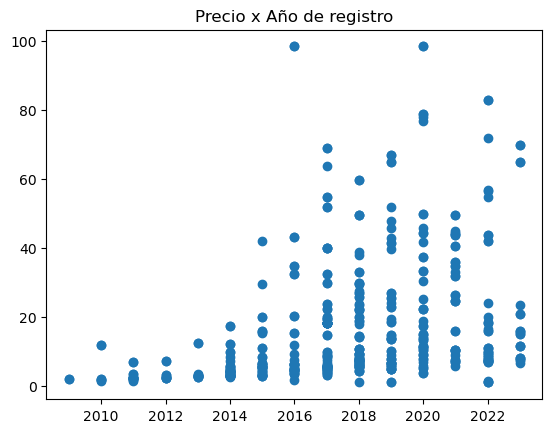

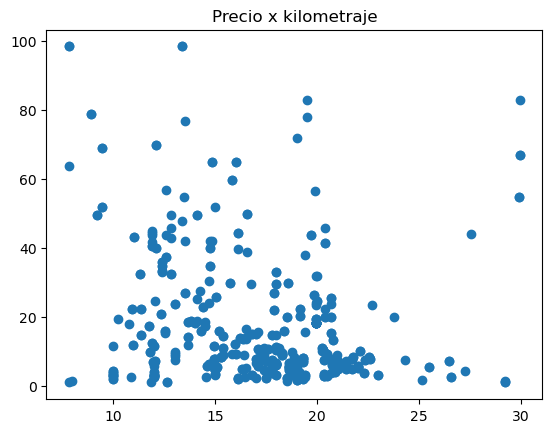

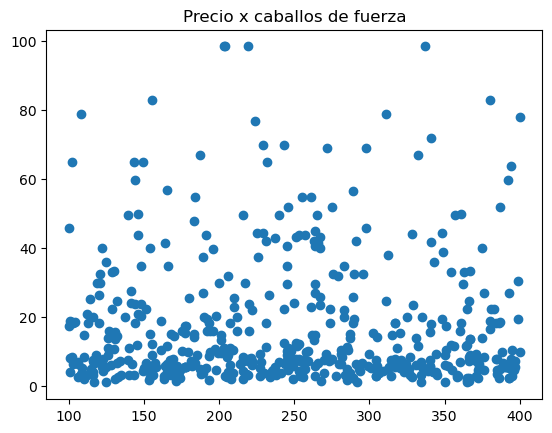

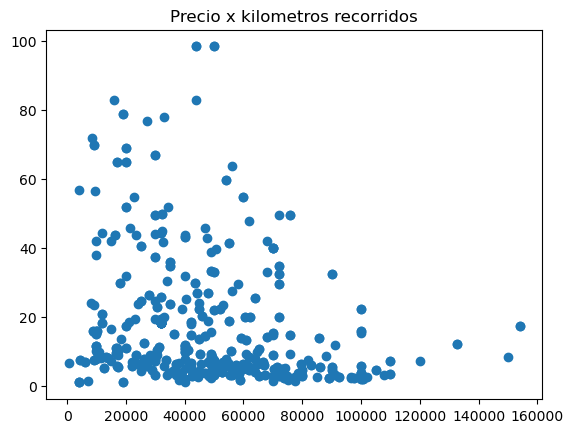

In [106]:
plt.scatter(arr_reg,arr_price)
plt.title("Precio x Año de registro")
plt.show()

plt.scatter(arr_klmt,arr_price)
plt.title("Precio x kilometraje")
plt.show()

plt.scatter(arr_cdf,arr_price)
plt.title("Precio x caballos de fuerza")
plt.show()

plt.scatter(arr_kmrec,arr_price)
plt.title("Precio x kilometros recorridos")
plt.show()



#### posible error en los datos  
Ford Figo 2011 vale 70,000 miles de dolares   
Hyunday Grand Magna tiene un kmtraje de 119.7   
Mercedes-Benz A-Class Limousine iene un kmtraje 147.51   

se corrigieron cambiandolos por 7 , 11.97 y 14.751 espectivamente, que son datos mas concistentes 

#### Todas estas features muestran una relacion distinta con respecto al precio de los autos, por lo que no podriamos generar una prediccion o la elaboracion del modelo ignorando alguna de estas, tambien es importante tomar en cuenta que los precios tienen una distribucion muy extraña asi que es imposible sacar de alguna de estas una prediccion por cosas como que en el año 2019 hay mas de 30 precios distinos, por lo tanto no contamos tampoco con una relacion certera entre cada uno de los datos, asi que la opcion mas viable ya que tenemos R4 -> R1 es crear un modelo de regresion lineal multivariable para asi no perder nada de informacion

In [107]:
''' generamos el modelo '''

modelo = LinearRegression()

''' acomodamos los datos'''

datos_entrada = pd.DataFrame({
    'año_registro': arr_reg,
    'km_recorridos': arr_kmrec,
    'kilometraje(kmpl)': arr_klmt,
    'caballos_fuerza': arr_cdf
})

salidas = datos['precio_dolares(miles)']

''' entrenamos el modelo con estos datos '''
modelo.fit(datos_entrada,salidas)

''' y ya nomas mostramos los coeficientes de la funcion'''
print("Coeficientes:")
for caract, coef in zip(datos_entrada.columns, modelo.coef_):
    print("   ",caract, "=",round(coef,6))
    


Coeficientes:
    año_registro = 2.211821
    km_recorridos = -1.2e-05
    kilometraje(kmpl) = -1.284694
    caballos_fuerza = 0.000716


Ahora comprobaremos que tan certero es nuestro modelo de predicción

In [108]:

y_pred = modelo.predict(datos_entrada)
print( "Calidad del modelo (de 0 a 1):" , (r2_score(salidas, y_pred)))
print(f"\nDesviacion promedio del resultado:" , np.sqrt(mean_squared_error(salidas, y_pred)))


Calidad del modelo (de 0 a 1): 0.20472288403365813

Desviacion promedio del resultado: 16.40097556096136


Esto lo podemos interpretar como que nuestro modelo no es tan bueno, pues la calidad del modelo es de .2, nisiquiera llega a .5 lo que significa que no es tan certero y sumando eso que nuestra desviacion en los datos es de 16.4 miles de dolares, este es un modelo medio impreciso.   
   
Ahora con otra funcion podemos crear un analisis de las relaciones entre los datos y el resultado, que en este caso es el precio del automovil el que nos interesa.

In [109]:
relaciones = datos[['precio_dolares(miles)','año_registro', 'km_recorridos', 'kilometraje(kmpl)', 'caballos_fuerza']].corr()
relaciones


,precio_dolares(miles),año_registro,km_recorridos,kilometraje(kmpl),caballos_fuerza
precio_dolares(miles),1.000000,0.353946,-0.239827,-0.237861,-0.014205
año_registro,0.353946,1.000000,-0.665439,0.117806,-0.001278
km_recorridos,-0.239827,-0.665439,1.000000,-0.098665,0.034789
kilometraje(kmpl),-0.237861,0.117806,-0.098665,1.000000,0.057980
caballos_fuerza,-0.014205,-0.001278,0.034789,0.057980,1.000000


In [110]:
modelo2 = LinearRegression()

datos_entrada2 = pd.DataFrame({
    'año_registro': arr_reg,
    'kilometraje(kmpl)': arr_klmt
})
salidas2 = datos['precio_dolares(miles)']

modelo2.fit(datos_entrada2,salidas2)

print("Coeficientes:")
for caract, coef in zip(datos_entrada2.columns, modelo2.coef_):
    print("   ",caract, "=",round(coef,6))

y_pred2 = modelo2.predict(datos_entrada2)
print( "\nCalidad del modelo (de 0 a 1):" , (r2_score(salidas2, y_pred2)))
print(f"\nDesviacion promedio del resultado:" , np.sqrt(mean_squared_error(salidas2, y_pred2)))

Coeficientes:
    año_registro = 2.282985
    kilometraje(kmpl) = -1.282096

Calidad del modelo (de 0 a 1): 0.20453033330201353

Desviacion promedio del resultado: 16.402960924710985


este modelo usando solo las variables mas relevantes tiene menos calidad que el modelo anteriror:   

0.20453033330201353 < 0.20472288403365813   

pero realmente es una diferencia muy pequeña asi que podemos ocuparlo para poder mostrarlo en el plano  3D

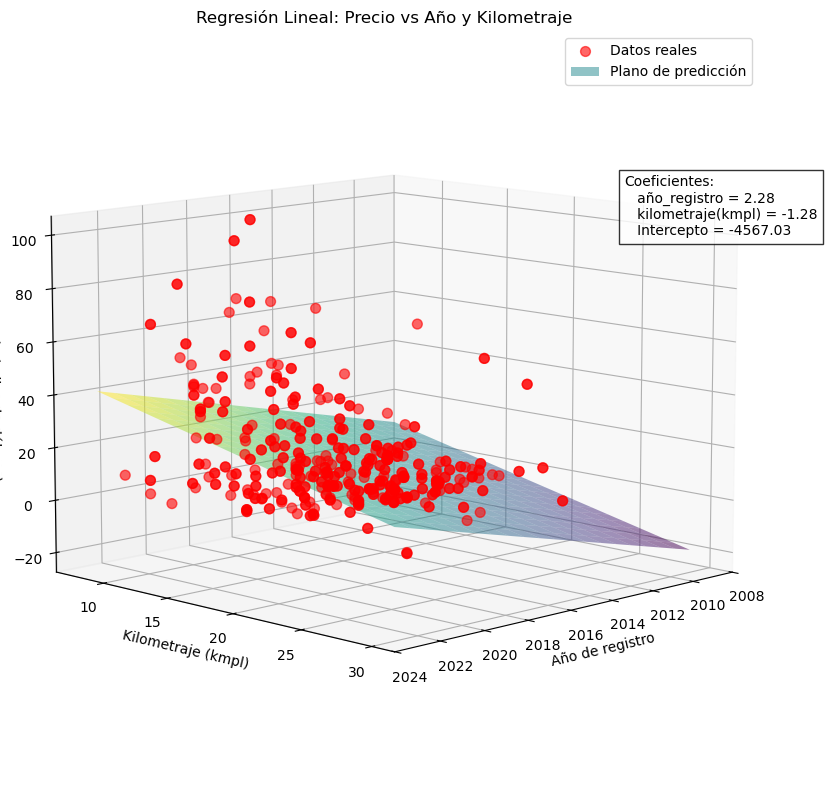

In [117]:
from mpl_toolkits.mplot3d import Axes3D

# Datos de entrada (ajusta según tus variables)
X1 = datos_entrada2['año_registro'].values  # Variable 1: año_registro
X2 = datos_entrada2['kilometraje(kmpl)'].values  # Variable 2: kilometraje
Y = salidas2.values  # Variable objetivo: precio_dolares(miles)

# Crear malla para el plano de predicción
x1_range = np.linspace(min(X1), max(X1), 20)
x2_range = np.linspace(min(X2), max(X2), 20)
X1_mesh, X2_mesh = np.meshgrid(x1_range, x2_range)

# Predecir el plano usando el modelo
Y_pred = modelo2.predict(pd.DataFrame({'año_registro': X1_mesh.ravel(),'kilometraje(kmpl)': X2_mesh.ravel()})).reshape(X1_mesh.shape)

# Configurar gráfica 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(X1, X2, Y, c='red', label='Datos reales', s=50, alpha=0.6)
ax.plot_surface(X1_mesh, X2_mesh, Y_pred, alpha=0.5, cmap='viridis', label='Plano de predicción')

# Añadir detalles
ax.set_xlabel('Año de registro')
ax.set_ylabel('Kilometraje (kmpl)')
ax.set_zlabel('Precio (miles de dólares)')
ax.set_title('Regresión Lineal: Precio vs Año y Kilometraje')
ax.view_init(elev=10, azim=45)

# Mostrar coeficientes en el título
coef_text = f"Coeficientes:\n   año_registro = {round(modelo2.coef_[0], 2)}\n   kilometraje(kmpl) = {round(modelo2.coef_[1], 2)}\n   Intercepto = {round(modelo2.intercept_, 2)}"
plt.figtext(0.7, 0.7, coef_text, bbox={'facecolor': 'white', 'alpha': 0.8})

ax.legend()
plt.tight_layout()
plt.show()